# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [7]:
#building the url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


#set up the lists 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
final_city = []

#weather check with api calls
for city in cities:
    query = query_url + city
    response = requests.get(query)
    response_json = response.json()
    try:
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        final_city.append(city)
        print(f"{city} found!")


    except:
        print("City not found, skipping...")
        pass
time.sleep(60)



chapais found!
longyearbyen found!
rikitea found!
padang found!
mount isa found!
bredasdorp found!
aleysk found!
City not found, skipping...
atuona found!
City not found, skipping...
lebu found!
ushuaia found!
znamenskoye found!
hasaki found!
chokurdakh found!
mar del plata found!
City not found, skipping...
port alfred found!
mazatlan found!
tucurui found!
zhigansk found!
mataura found!
City not found, skipping...
ust-shonosha found!
petropavlovsk-kamchatskiy found!
codrington found!
tuktoyaktuk found!
shenzhen found!
kouango found!
nikolskoye found!
nishihara found!
east london found!
lata found!
cherskiy found!
avarua found!
tual found!
kushiro found!
castro found!
marawi found!
hobart found!
cape town found!
punta arenas found!
shizunai found!
namibe found!
iqaluit found!
getahovit found!
vianen found!
waingapu found!
san patricio found!
arraial do cabo found!
yongan found!
cockburn town found!
katangli found!
vaini found!
grindavik found!
kutum found!
jamestown found!
City not fou

oudtshoorn found!
znin found!
port moresby found!
voh found!
fare found!
pisco found!
ostrovnoy found!
nuuk found!
beaverton found!
martinsicuro found!
City not found, skipping...
caruray found!
uchana found!
san angelo found!
antofagasta found!
dicabisagan found!
savona found!
imeni zhelyabova found!
airai found!
kenai found!
imbituba found!
saint-jean-de-maurienne found!
broome found!
roma found!
itoman found!
kaspiysk found!
palasa found!
canaries found!
khorixas found!
charlestown found!
bolobo found!
lavrentiya found!
City not found, skipping...
dunedin found!
vuktyl found!
lagoa found!
beloha found!
nosivka found!
kavaratti found!
alihe found!
City not found, skipping...
socuellamos found!
talas found!
port shepstone found!
dudinka found!
praia found!
beisfjord found!
bratsk found!
luderitz found!
mahibadhoo found!
City not found, skipping...
lodja found!
hambantota found!
tromso found!
vestmannaeyjar found!
nilanga found!
araceli found!
russell found!
kamakhyanagar found!
hirara

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
final_city = pd.DataFrame({
    'City': final_city,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

final_city

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            chapais  49.7834  -74.8492    -22.41       100         100   
1       longyearbyen  78.2186   15.6401     -2.09        74           0   
2            rikitea -23.1203 -134.9692     25.83        69          19   
3             padang  -0.9492  100.3543     29.03        80          96   
4          mount isa -20.7333  139.5000     41.87        17           4   
..               ...      ...       ...       ...       ...         ...   
550        katherine -14.4667  132.2667     38.18        32          74   
551          malakal   9.5334   31.6605     26.20        25          93   
552    moose factory  51.2585  -80.6094     -9.00        86          90   
553  aleksandrov gay  50.1470   48.5704     -2.63        93         100   
554             poum -20.2333  164.0167     26.15        61           0   

     Wind Speed Country        Date  
0          0.84      CA  1639542663  
1          8.23      SJ  1639542663  
2          1.50      PF  1639542664  
3          2.92      ID  1639542651  
4          3.60      AU  1639542664  
..          ...     ...         ...  
550        3.09      AU  1639542819  
551        4.41      SS  1639542819  
552        3.60      CA  1639542819  
553        4.92      RU  1639542819  
554        8.70      NC  1639542819  

[555 rows x 9 columns]

In [9]:
final_city.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  555.000000  555.000000  555.000000  555.000000  555.000000  555.000000   
mean    20.590477   22.229913   11.286144   73.154955   62.218018    3.502108   
std     32.794282   90.497655   16.580509   19.847281   37.999777    2.648020   
min    -54.800000 -175.200000  -43.080000   12.000000    0.000000    0.000000   
25%     -6.061800  -56.146500    1.655000   61.000000   20.000000    1.540000   
50%     25.533300   27.911600   16.030000   76.000000   75.000000    2.820000   
75%     46.932650  102.016100   24.175000   90.000000   99.000000    5.140000   
max     78.218600  178.416700   41.870000  100.000000  100.000000   15.580000   

               Date  
count  5.550000e+02  
mean   1.639543e+09  
std    6.599617e+01  
min    1.639542e+09  
25%    1.639543e+09  
50%    1.639543e+09  
75%    1.639543e+09  
max    1.639543e+09

In [10]:
#exporting the dataframe

final_city.to_csv('final_city.csv', encoding='utf-8')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#The maximum humidity for all the cities in this dataframe is 100, therefore this step will be skipped.

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  550.000000  550.000000  550.000000  550.000000  550.000000  550.000000   
mean    19.973545   17.124400   58.331400   67.890909   52.141818    8.544800   
std     33.284840   91.595451   25.795297   20.864881   35.766469    6.078869   
min    -54.800000 -179.170000  -11.340000    9.000000    0.000000    0.160000   
25%     -8.077500  -64.627500   42.800000   55.000000   20.000000    4.525000   
50%     23.630000   19.635000   64.940000   72.000000   57.000000    7.325000   
75%     48.672500   97.350000   78.800000   83.000000   86.750000   11.410000   
max     78.220000  179.320000  102.200000  100.000000  100.000000   46.080000   

               Date  
count  5.500000e+02  
mean   1.585764e+09  
std    5.539674e+01  
min    1.585764e+09  
25%    1.585764e+09  
50%    1.585764e+09  
75%    1.585764e+09  
max    1.585764e+09

In [45]:
#  Get the indices of cities that have humidity over 100%.


In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

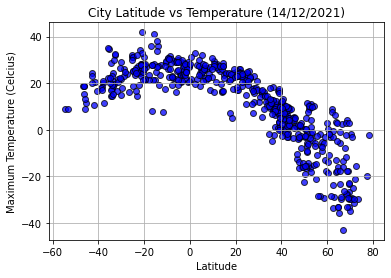

In [31]:
x = final_city["Lat"]
y = final_city["Max Temp"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.title("City Latitude vs Temperature (14/12/2021)")

plt.savefig("./Image/City Latitude vs Temperature.png")
plt.show()

In [ ]:
# This graph demonstrated the relationship between latitude and maximum temperature, as the temperature is the highest around the 0 latitude (the equator) and decrese as cities moves further away from the equator.

## Latitude vs. Humidity Plot

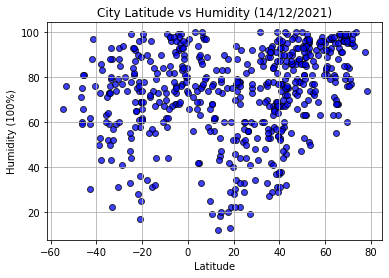

In [32]:
x = final_city["Lat"]
y = final_city["Humidity"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (100%)")
plt.title("City Latitude vs Humidity (14/12/2021)")

plt.savefig("./Image/City Latitude vs Humidity.png")
plt.show()

In [ ]:
 #This graph demonstrated the relationship between latitude and humidity, judging the graph solely, there is no significant relationship between the two variables.

## Latitude vs. Cloudiness Plot

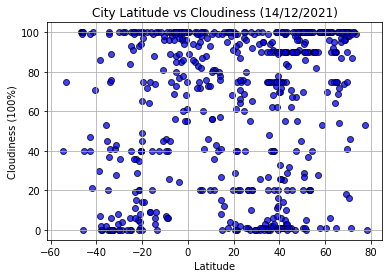

In [33]:
x = final_city["Lat"]
y = final_city["Cloudiness"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (100%)")
plt.title("City Latitude vs Cloudiness (14/12/2021)")

plt.savefig("./Image/City Latitude vs Cloudiness.png")
plt.show()

In [ ]:
#This graph demonstrated the relationship between latitude and cloudiness, judging the graph solely, there is no significant relationship between the two variables.

## Latitude vs. Wind Speed Plot

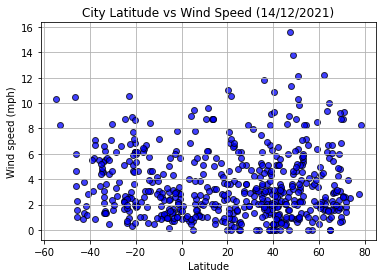

In [34]:
x = final_city["Lat"]
y = final_city["Wind Speed"]

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("City Latitude vs Wind Speed (14/12/2021)")

plt.savefig("./Image/City Latitude vs Wind Speed.png")
plt.show()

In [ ]:
#This graph demonstrated the relationship between latitude and wind speed, judging the graph solely, there is no significant relationship between the two variables.

## Linear Regression

In [35]:
#split the original dataframe into 2 based on the value of the latitude
northern_hem_df = final_city[final_city['Lat'] > 0]
southern_hem_df = final_city[final_city['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

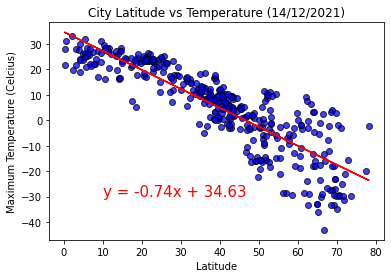

R squared: 0.7517385818107459


In [36]:
#scatter plot
x = northern_hem_df["Lat"]
y = northern_hem_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.title("City Latitude vs Temperature (14/12/2021)")

plt.savefig("./Image/NH-City Latitude vs Max Temp.png")
plt.show()


#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is a strong, negative relationship between the latitue of the city and its maximum temperature in the 
#northen hemisphere, higher the latitue, lower the temperaute. R suqared of 0.75 means that 75% of 
#the variation in the output variable (Maximum temperature) is explained by the input variables (Latitue).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

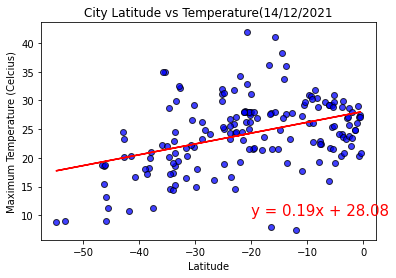

R squared: 0.16594678232444698


In [37]:
x = southern_hem_df["Lat"]
y = southern_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.title("City Latitude vs Temperature(14/12/2021")

plt.savefig("./Image/SH-City Latitude vs Max Temp.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is a weak, positive relationship between the latitue of the city and its maximum temperature in the 
#southern hemisphere, higher the latitue, higer the temperaute. However, R suqared of 0.16 means that only 16% of 
#the variation in the output variable (Maximum temperature) is explained by the input variables (Latitue), therefore
#this relationship is weak.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

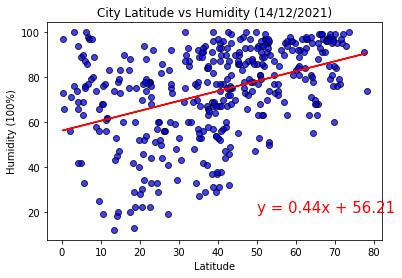

R squared: 0.16901225135281586


In [47]:
x = northern_hem_df["Lat"]
y = northern_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (100%)")
plt.title("City Latitude vs Humidity (14/12/2021)")

plt.savefig("./Image/NH-City Latitude vs Humidity.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is a weak, positive relationship between the latitue of the city and its humidity level in the 
#northern hemisphere, higher the latitue, higer the humidity level. However, R suqared of 0.16 means that only 16% of 
#the variation in the output variable (humidity level) is explained by the input variables (Latitue), therefore
#this relationship is weak.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

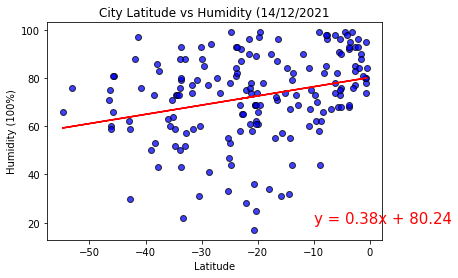

R squared: 0.07969765186350493


In [40]:
x = southern_hem_df["Lat"]
y = southern_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (100%)")
plt.title("City Latitude vs Humidity (14/12/2021")

plt.savefig("./Image/SH-City Latitude vs Humidity.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is a very weak, positive relationship between the latitue of the city and its humidity level in the 
#southern hemisphere. However, R suqared of 0.07 means that only 7% of 
#the variation in the output variable (humidity level) is explained by the input variables (Latitue), therefore
#this relationship is very weak and other geological patterns may predict the humidity bettter than the latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

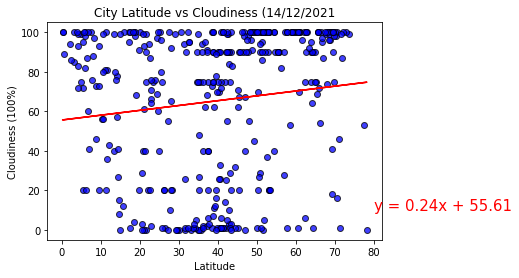

R squared: 0.015852244835885067


In [41]:
x = northern_hem_df["Lat"]
y = northern_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(80,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (100%)")
plt.title("City Latitude vs Cloudiness (14/12/2021")

plt.savefig("./Image/NH-City Latitude vs Cloudiness.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is alomst no relationship between the latitue of the city and its cloudiness level in the 
#northern hemisphere, as the R suqared of 0.01 means that only 1% of 
#the variation in the output variable (cloudiness level) is explained by the input variables (Latitue), therefore
#other geological patterns may predict the cloudiness level bettter than the latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

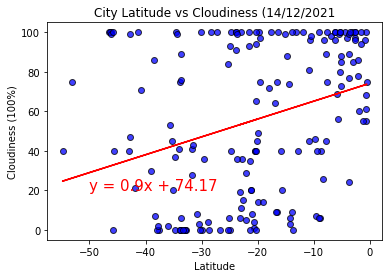

R squared: 0.09654224109003301


In [42]:
x = southern_hem_df["Lat"]
y = southern_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (100%)")
plt.title("City Latitude vs Cloudiness (14/12/2021")

plt.savefig("./Image/SH-City Latitude vs Cloudiness.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is a very weak, positive relationship between the latitue of the city and its cloudiness level in the 
#southern hemisphere. However, R suqared of 0.09 means that only 9% of 
#the variation in the output variable (cloudiness level) is explained by the input variables (Latitue), therefore
#this relationship is very weak and other geological patterns may predict the cloudiness level bettter than the latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

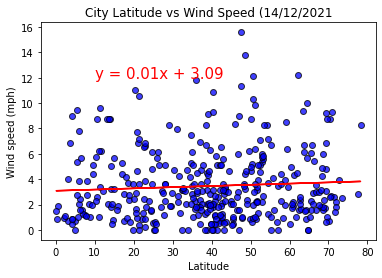

R squared: 0.004268046360511588


In [43]:
x = northern_hem_df["Lat"]
y = northern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("City Latitude vs Wind Speed (14/12/2021")

plt.savefig("./Image/NH-City Latitude vs Wind Speed.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is  no relationship between the latitue of the city and its wind speed in the 
#northern hemisphere, as the R suqared of 0.004 means that only 0.4% of 
#the variation in the output variable (wind speed) is explained by the input variables (Latitue), therefore
#other geological patterns may predict the wind speed bettter than the latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

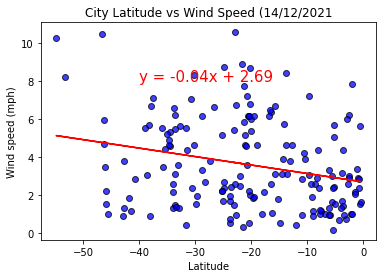

R squared: 0.06356128145877511


In [44]:
x = southern_hem_df["Lat"]
y = southern_hem_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y,marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.title("City Latitude vs Wind Speed (14/12/2021")

plt.savefig("./Image/SH-City Latitude vs Wind Speed.png")
plt.show()

#calculating r2
print(f"R squared: {rvalue**2}")

#Analysis

#There is a very weak, negative relationship between the latitue of the city and its wind speed in the 
#southern hemisphere. However, R suqared of 0.06 means that only 6% of 
#the variation in the output variable (wind speed) is explained by the input variables (Latitue), therefore
#this relationship is very weak and other geological patterns may predict the cloudiness level bettter than the latitude.
